In [1]:
#step 1: setup and imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
#step 2:set correct folder paths

data_dir = Path("train") 
categories = ["cats", "dogs"]
img_size = 64
max_images = 1000  



In [3]:
#step 3 : load and preprocess images

data = []
labels = []

for label, category in enumerate(categories):  # 0 for cat, 1 for dog
    folder = data_dir / category
    images = os.listdir(folder)[:max_images]
    print(f"Loading {len(images)} images from {category}...")

    for img_name in images:
        try:
            img_path = folder / img_name
            img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img.flatten())
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")

X = np.array(data)
y = np.array(labels)

print("Total images loaded:", len(X))


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'train\\cats'

In [ ]:
#step 4: train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
#step 5: feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#step 6: train the svm model

svm_model = SVC(kernel='linear') 
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear')

Accuracy: 0.49

Classification Report:

              precision    recall  f1-score   support

         Cat       0.49      0.57      0.53       200
         Dog       0.49      0.41      0.45       200

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.49      0.49      0.49       400



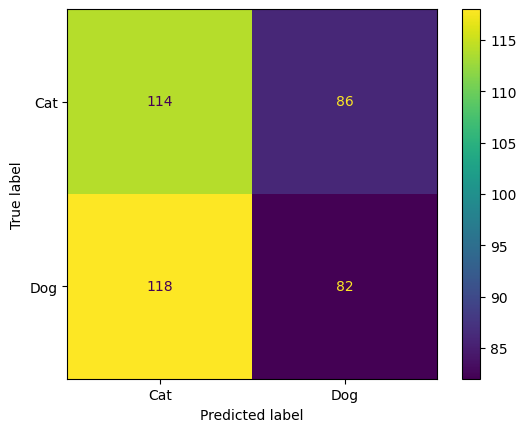

In [ ]:
#step 6: evaluate the model

y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot()
plt.show()


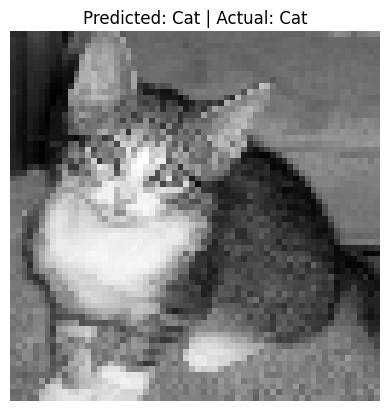

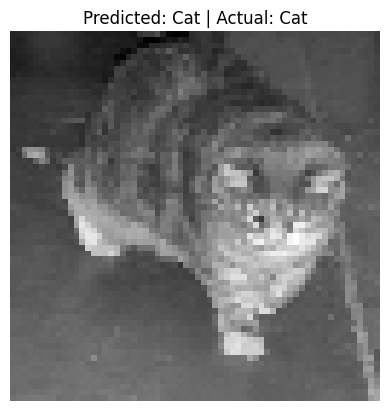

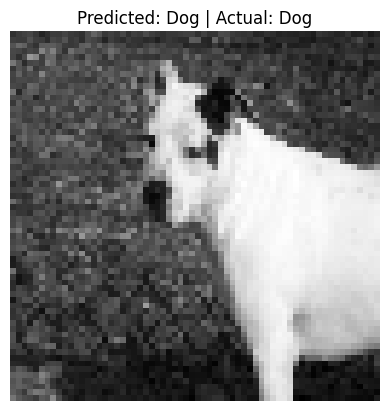

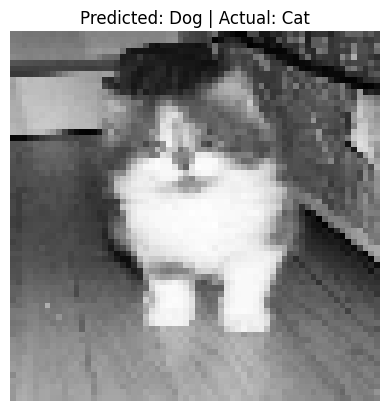

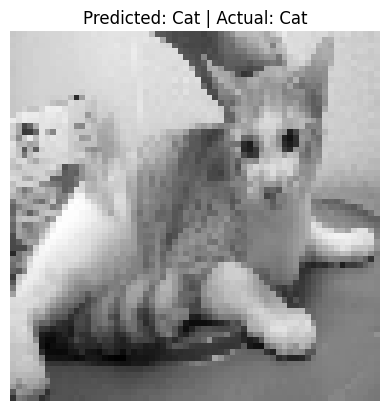

In [ ]:
#visualise predictions

def show_predictions(n=5):
    for i in range(n):
        img = X_test[i].reshape(img_size, img_size)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {'Dog' if y_pred[i] else 'Cat'} | Actual: {'Dog' if y_test[i] else 'Cat'}")
        plt.axis('off')
        plt.show()

show_predictions(5)
